# Multilayer Perceptron in Gluon

In [22]:
!pip install mxnet
!pip install d2l

In [0]:
import d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn
import time

## The Model

In [0]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'))
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

## Training

delta time 85.694707 sec


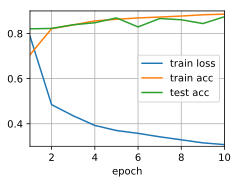

In [25]:
batch_size, num_epochs = 256, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
start = time.time()
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
delta_time=time.time() - start
print('delta time %f sec' % (delta_time))

In [26]:
test_accuracy = d2l.evaluate_accuracy(net,test_iter)
train_accuracy = d2l.evaluate_accuracy(net,train_iter)
print("Loss: %s, Train_acc %s, Test_acc %s" %(loss, train_accuracy, test_accuracy))

Loss: SoftmaxCrossEntropyLoss(batch_axis=0, w=None), Train_acc 0.8873833333333333, Test_acc 0.8744


##Multilayer Perceptron in Keras

In [0]:
import keras


from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dropout

In [31]:
# grab the Fashion MNIST dataset (if this is your first time running
# this the dataset will be automatically downloaded)
print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
 
# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)
 
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

[INFO] loading Fashion MNIST...


In [33]:
width=28
height=28
depth=1
classes=10
batch_size, num_epochs = 256, 10
model = Sequential()
model.add(Flatten(input_shape=(height, width, depth)))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [34]:
start = time.time()
model.fit(trainX , trainY, batch_size=batch_size, epochs=num_epochs, shuffle=False)
delta_time=time.time() - start
print('delta time %f sec' % (delta_time))

Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 1.2744 - acc: 0.6286
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.8130 - acc: 0.7425
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.7028 - acc: 0.7755
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.6435 - acc: 0.7939
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.6048 - acc: 0.8055
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.5770 - acc: 0.8141
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.5558 - acc: 0.8193
Epoch 8/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.5391 - acc: 0.8237
Epoch 9/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.5253 - acc: 0.8275
Epoch 10/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.5138 - acc: 0.8304